In [9]:
import math
import numpy as np


def translation_matrix(a):
    return np.array([
        [1, 0, a[0]],
        [0, 1, a[1]],
        [0, 0, 1]
    ])


def rotation_matrix(phi_radians, center, t=np.array([0, 0])):
    cos_phi, sin_phi = math.cos(phi_radians), math.sin(phi_radians)
    cx, cy = center
    return np.array([
        [cos_phi, -sin_phi, - (cx * cos_phi - cy * sin_phi) + cx + t[0]],
        [sin_phi, cos_phi, - (cx * sin_phi + cy * cos_phi) + cy + t[1]],
        [0, 0, 1]
    ])


def scale_matrix(sx, sy, t=np.array([0, 0])):
    return np.array([
        [sx, 0, t[0]],
        [0, sy, t[1]],
        [0, 0, 1]
    ])


def shear_x_matrix(k, t=np.array([0, 0])):
    return np.array(
        [
            [1, k, t[0]],
            [0, 1, t[1]],
            [0, 0, 1]
        ]
    )


def apply_transform_to_control_points(T, control_points):
    control_points_t = np.transpose(control_points)
    control_points_homogenous = np.vstack([control_points_t, np.ones((1, control_points_t.shape[1]))])
    return np.transpose((T @ control_points_homogenous)[:2])


def bezier_curve_points(control_points, alpha=0.05):
    # Порядок кривой
    n = len(control_points) - 1
    if n < 0:
        raise ValueError()
    if n == 0:
        return control_points
    results = []
    for t in np.arange(0, 1 + alpha, alpha):
        b = np.copy(control_points)
        for j in range(1, n + 1):
            for i in range(0, n - j + 1):
                b[i] = (1.0 - t) * b[i] + t * b[i + 1]

        results.append((np.copy(b[0])))
    return np.array(results)


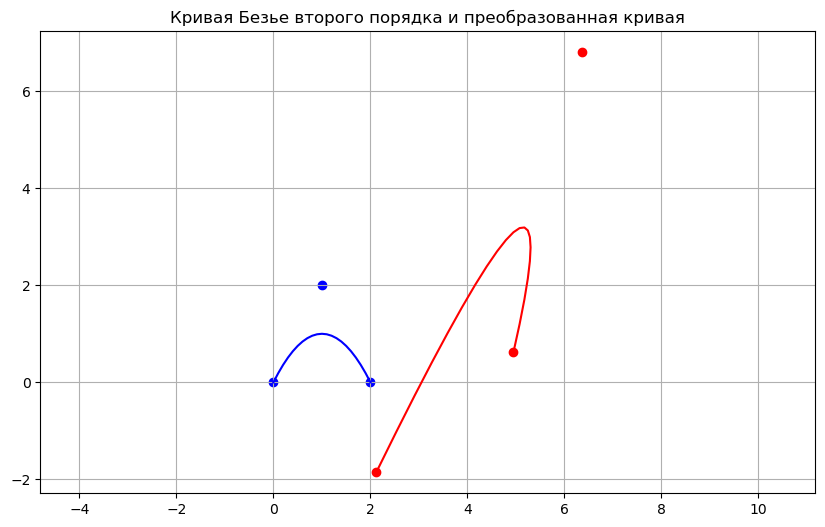

In [10]:
import matplotlib.pyplot as plt


def plot_bezier_curve(curve, control_points, color='blue', label=None):
    plt.plot(curve[:, 0], curve[:, 1], label=label, color=color)
    plt.scatter(control_points[:, 0], control_points[:, 1], color=color, marker='o')


points_2 = np.array([
    [0, 0],
    [1.0, 2.0],
    [2.0, 0]
])
T = scale_matrix(2, 1.75) @ rotation_matrix(np.pi / 4, center=(0, 0)) @ shear_x_matrix(2) @ translation_matrix(
    [3, -1.5])
transformed_points_2 = apply_transform_to_control_points(T, points_2)
bezier_original = bezier_curve_points(points_2)
bezier_transformed = bezier_curve_points(transformed_points_2)

plt.figure(figsize=(10, 6))
plot_bezier_curve(bezier_original, points_2, 'blue', 'Исходная кривая')
plot_bezier_curve(bezier_transformed, transformed_points_2, 'red', 'После преобразований')

plt.axis("equal")
plt.grid(True)
plt.title("Кривая Безье второго порядка и преобразованная кривая")
plt.show()


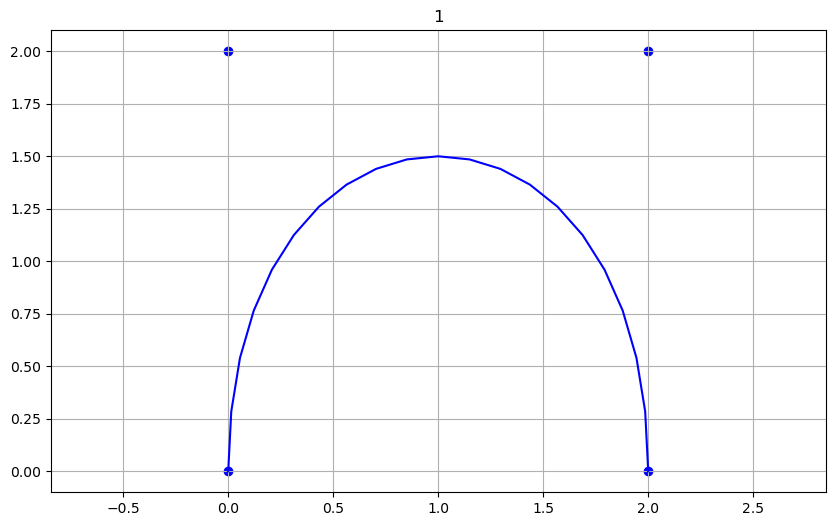

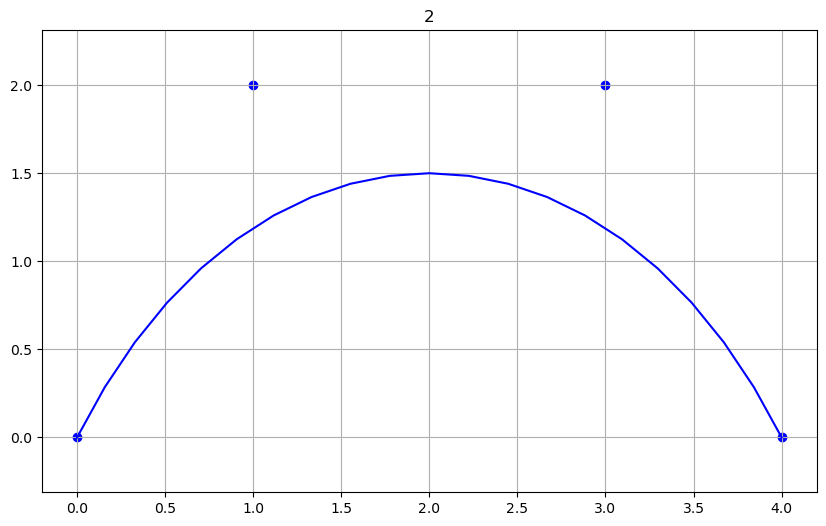

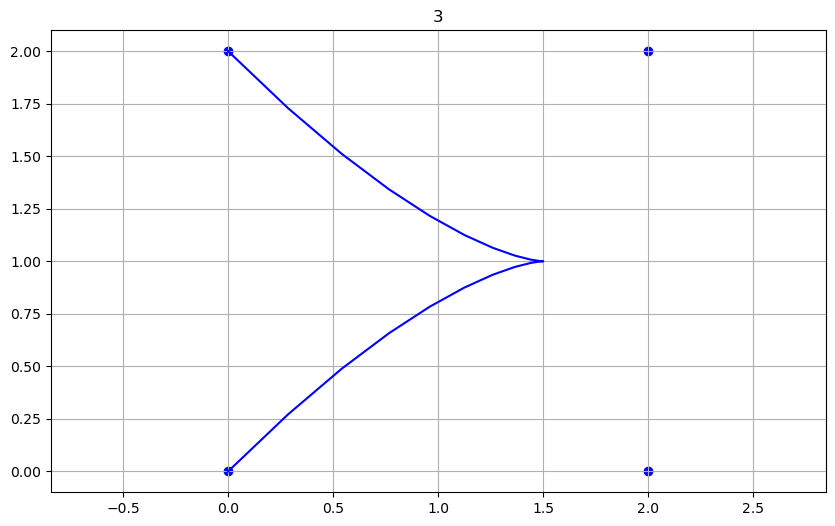

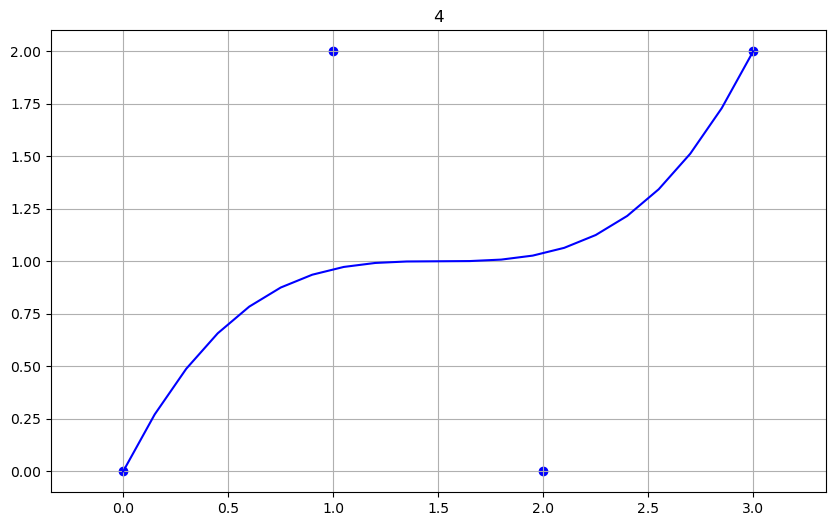

In [11]:
points_list = np.array(
    [
        [[0, 0], [0, 2], [2, 2], [2, 0]],
        [[0, 0], [1, 2], [3, 2], [4, 0]],
        [[0, 0], [2, 2], [2, 0], [0, 2]],
        [[0, 0], [1, 2], [2, 0], [3, 2]],
    ], dtype=np.float32
)
for i, point in enumerate(points_list):
    plt.figure(figsize=(10, 6))
    plot_bezier_curve(bezier_curve_points(point), point, label=f"Кривая № {i}")
    plt.axis("equal")
    plt.grid(True)
    plt.title(i + 1)
    plt.show()

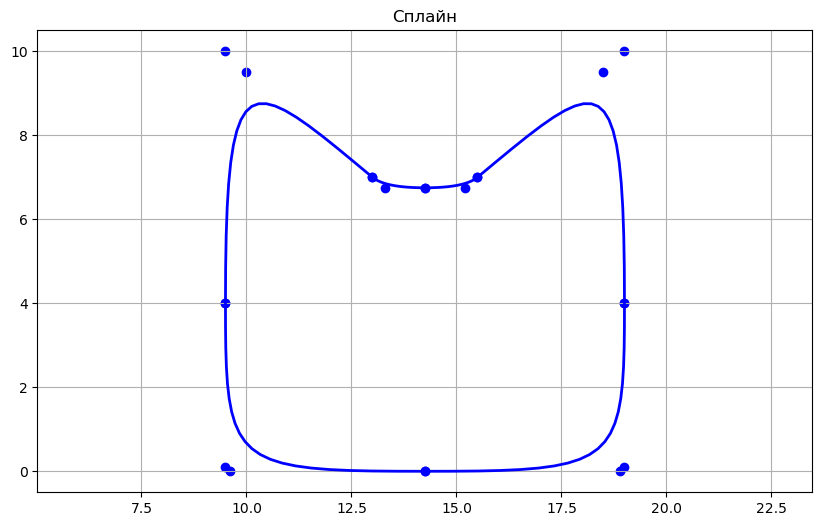

In [12]:
def build_spline(points_list, alpha=0.05):
    all_points = []
    for control_points in points_list:
        curve = bezier_curve_points(np.array(control_points), alpha)
        all_points.append(curve)
    return np.vstack(all_points)


points_list = [
    [[14.25, 0], [18.9, 0], [19.0, 0.1], [19.0, 4.0]],
    [[19.0, 4.0], [19.0, 10.0], [18.5, 9.5], [15.5, 7.0]],
    [[15.5, 7.0], [15.2, 6.75], [14.25, 6.75]],
    [[14.25, 6.75], [13.3, 6.75], [13.0, 7.0]],
    [[13.0, 7.0], [10.0, 9.5], [9.5, 10.0], [9.5, 4.0]],
    [[9.5, 4.0], [9.5, 0.1], [9.6, 0.0], [14.25, 0]]
]

spline = build_spline(points_list)

plt.figure(figsize=(10, 6))
for control in points_list:
    control_np = np.array(control)
    plt.scatter(control_np[:, 0], control_np[:, 1], color='blue', marker='o')  # контрольные точки
plt.plot(spline[:, 0], spline[:, 1], 'blue', linewidth=2, label="Сплайн")
plt.axis('equal')
plt.grid(True)
plt.title("Сплайн")
plt.show()
